# Part II - (Ford GoBike System Data Slide Presentation)
## by (Franklin Nwachukwu)

## Investigation Overview


> In this investigation, I want to look at the differen characteristics of type of users. I would like to know if there is some station in where the amount of the type of user Customer is using this service more than the type of user Subscriber. This can be seen as an oportunity to promote this service more in the area of this stations in where the company can increase the amount of subscribers.



## Dataset Overview

> The data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data is from 2017 until April 2019. The total amount of data is 3,254,325 rides.


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import json
import zipfile
import os
import seaborn as sns
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means that when the notebook is rendered as http slides, those cells won't show up.

## Types of Bike users

> In this dataset there are 2 types of users (Subscriber and Customer). In most of the cases (84.5%) the user is Subscriber and the rest (15.5%) the user is Customer.

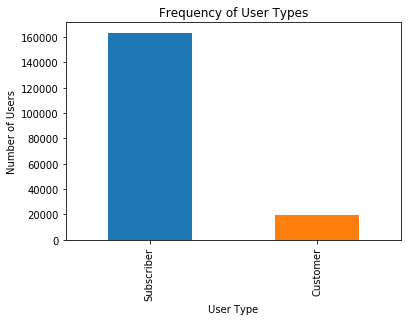

In [5]:
bike_data.user_type.value_counts().plot(kind='bar')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Frequency of User Types');

The bar chat above shows that ***subscribers*** form more of the user type than ***customers***

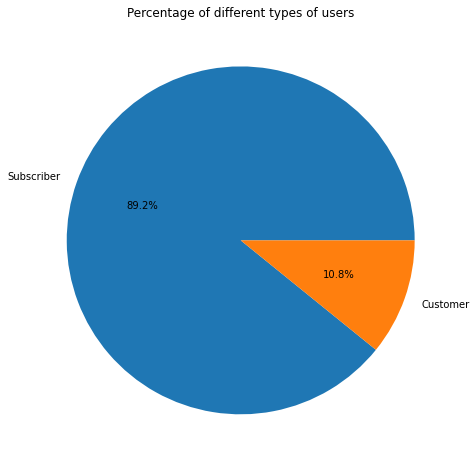

In [8]:
# Also creating a pie plot with the different percentages of users
bike_data.user_type.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8));
plt.title('Percentage of different types of users')
plt.ylabel('')
plt.show()

The pie chart shows that 89.2% of the users are ***Subscribers*** while 10.8% are ***Customers***

## Duration of Trip against User Type

>It seems that the longer trips were preformed more by Customers more than Subscribers

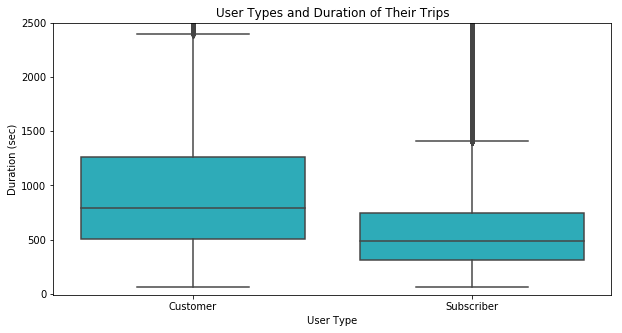

In [6]:
# Plotting duration of trip against user type
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[9]
sb.boxplot(data = bike_data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('User Types and Duration of Their Trips');

The boxplot shows that **Customers** tend to have more lasting trips than **Subscribers**. 

## Distribution of User Age against Trip Duration

> It can observed that the majority of users are between 15 to 45 years old with concentrated high duartion of trips around the age of 30 years old.

In [7]:
# Dropping null values in the dataset
bike_data = bike_data.dropna()
bike_data = bike_data.reset_index(drop=True)
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [9]:
# Creating an Age based column.
bike_data['user_age'] = 2022 - bike_data['member_birth_year']

bike_data['user_age'] = bike_data['user_age'].astype(int)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
user_age                   174952 non-null int64
dtypes: float64(7), int64(3), objec

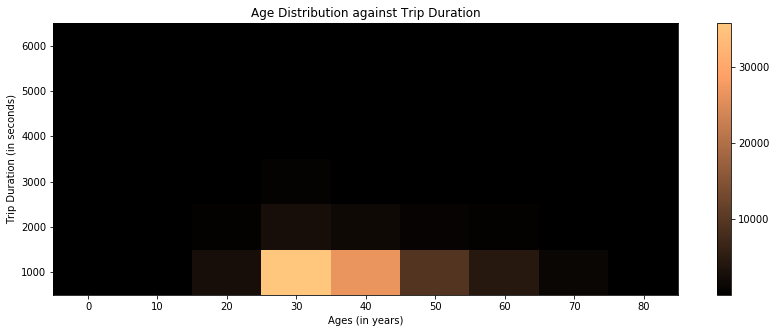

In [11]:
# Plotting
plt.figure(figsize=[14,5])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(bike_data['user_age'], bike_data['duration_sec'],
           bins = [bins_x, bins_y],cmap='copper')
plt.colorbar(ticks=[10000, 20000, 30000, 40000])
plt.xlabel('Ages (in years)')
plt.ylabel('Trip Duration (in seconds)')
plt.title('Age Distribution against Trip Duration');

Users within the age groups of 25 to 35 years seem to has longer trips.

##  Age and Gender distribution against trip duration

> It seems a more frequent longer duration for Other between the age of 50 to 60 years old

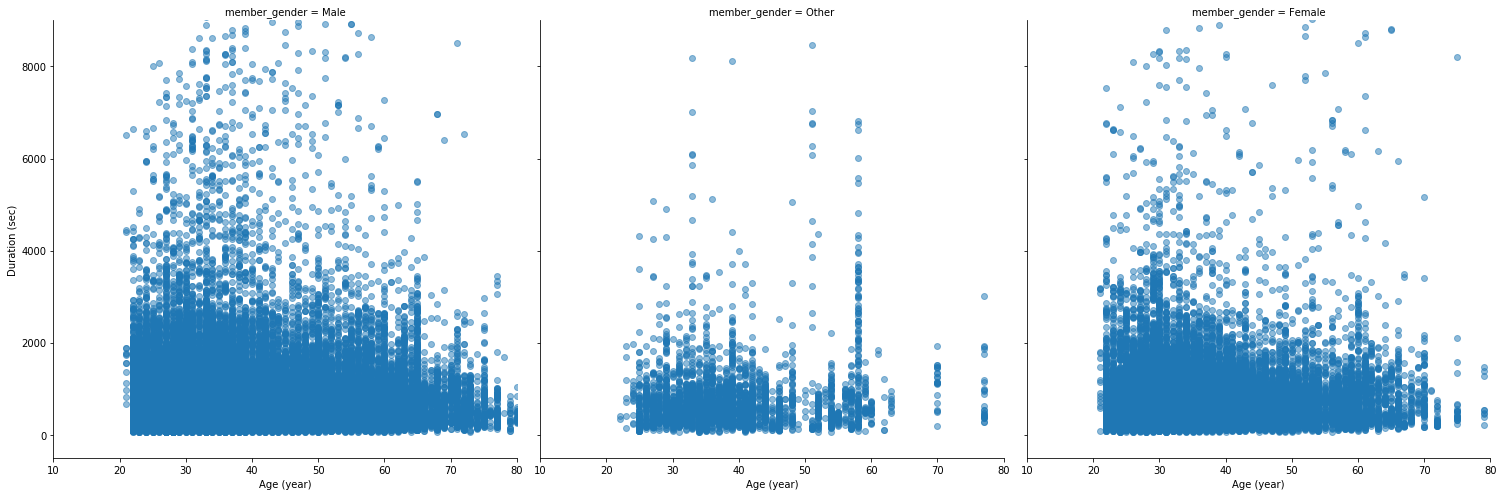

In [24]:
# Age and Gender distribution against trip duration
bike_data['age'] = (2022 - bike_data['member_birth_year'])
genders = sb.FacetGrid(data = bike_data, col = 'member_gender', col_wrap = 3, size = 7,
                 xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.5)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)');

The grid shows males tend to last longer in the trips across all ages whie the other genders tend to last less across the age distribution.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template_analysis-of-fordgobike-dataset.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
